# 데이터 시각화

## Matplotlib

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

### 1. 선그래프

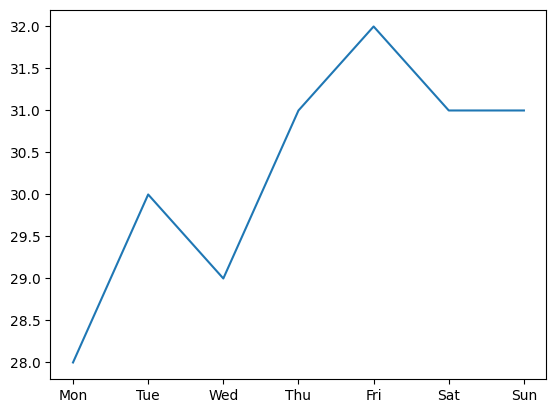

In [9]:
plt.figure()
plt.plot(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"],[28,30,29,31,32,31,31])
plt.show()

#### 산점도 그리기
- 산점도는 키와 몸무게같은 **두 값 간의 관계**를 표현
- 두 값이 양의 상관관계인지 음의 상관관계인지 파악
`plt.scatter()`사용, **X**, **Y**값 지정

In [14]:
df = pd.read_csv('cust_data.csv')
df.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,by_age,bill_rating,low,lowmid,mid,midhigh,high
0,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,Y,25,low,1,0,0,0,0
1,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,N,20,high,0,0,0,0,1
2,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,N,30,high,0,0,0,0,1
3,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,N,15,lowmid,0,1,0,0,0
4,C,F,78,1,N,N,1361.7999,1173.99990,0.0000,N,75,low,1,0,0,0,0


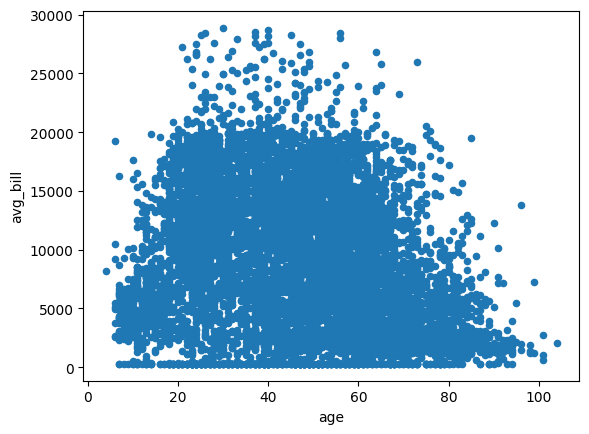

In [15]:
df.plot(kind = 'scatter', x = 'age',y = 'avg_bill')
plt.show()

#### 히스토그램
- 수치형 데이터의 분포
- **빈도, 밀도, 확률** 등의 분포를 그릴때 사용
- bins의 default = 10

`plt.hist()` 사용 


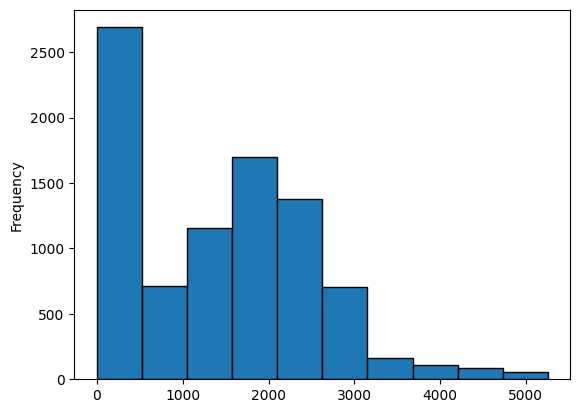

In [16]:
df['A_bill'].plot(kind='hist', edgecolor = 'k')
plt.show()

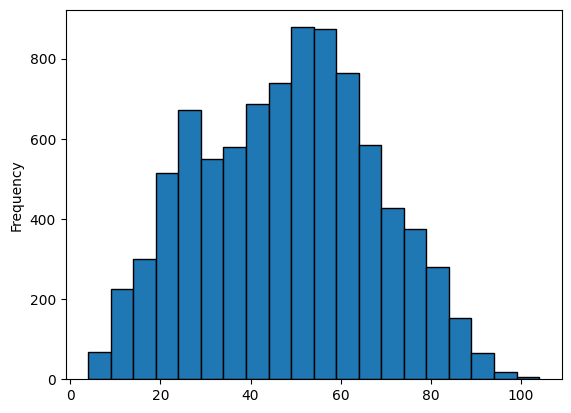

In [17]:
df['age'].plot(kind='hist', bins=20,edgecolor = 'k')
plt.show()

#### 박스 그래프
- 수치적 자료를 표현
- 5가지 요약 수치(최솟값, 1~3사분위값, 최댓값)
`plt.boxplot()` 사용

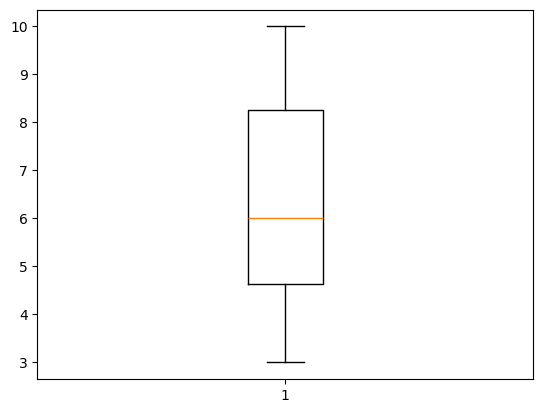

In [19]:
x=[5, 3, 7, 10, 9, 5, 3.5, 8]

plt.boxplot(x=x)
plt.show()

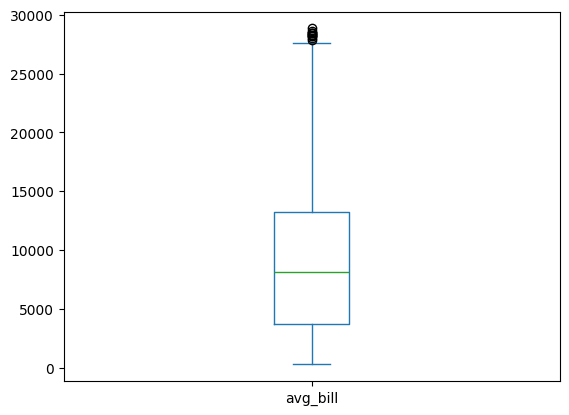

In [21]:
df['avg_bill'].plot(kind='box')
plt.show()

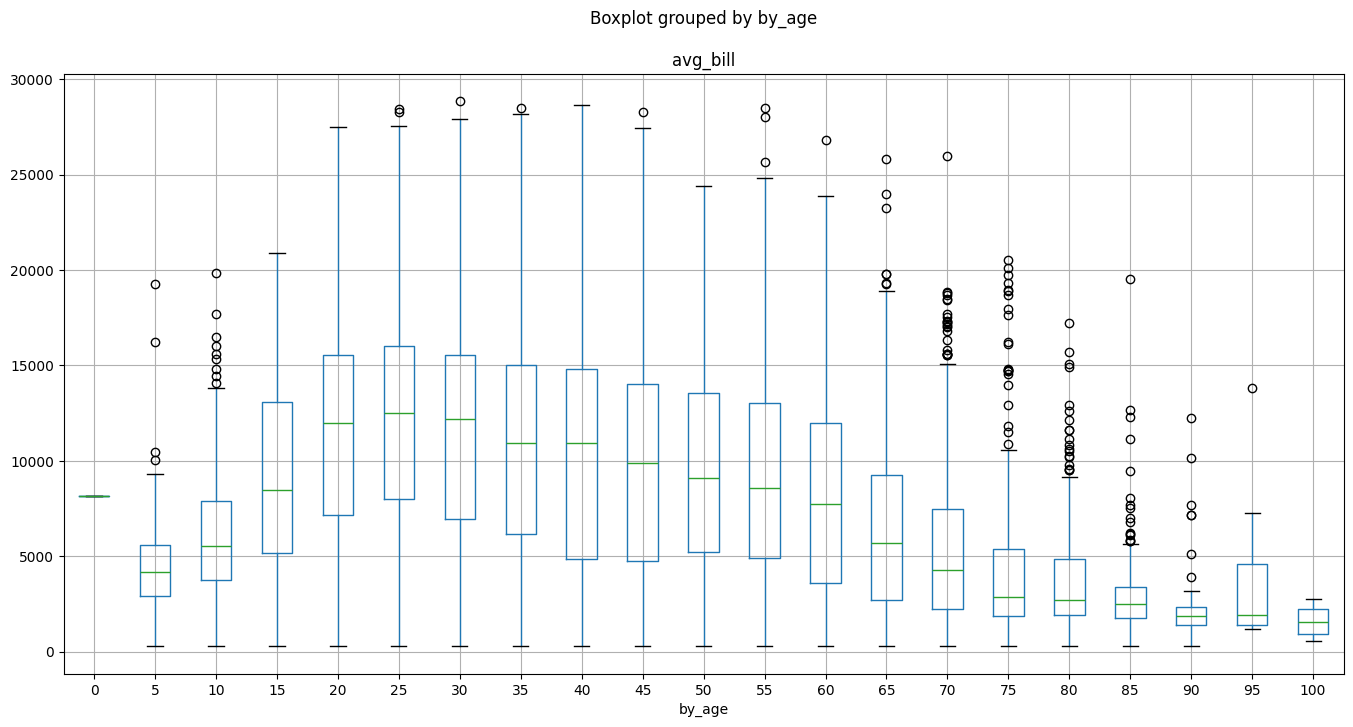

In [22]:
df.boxplot(by='by_age', column='avg_bill',figsize=(16,8))
plt.show()

### 2. 차트 꾸미기

#### 제목과 축 레이블 추가하기
plot에 X,Y축 레이블 및 제목을 붙이기 위해선 
- `plt.xlabel(축이름)`
- `plt.ylabel(축이름)`
- `plt.title(제목)`

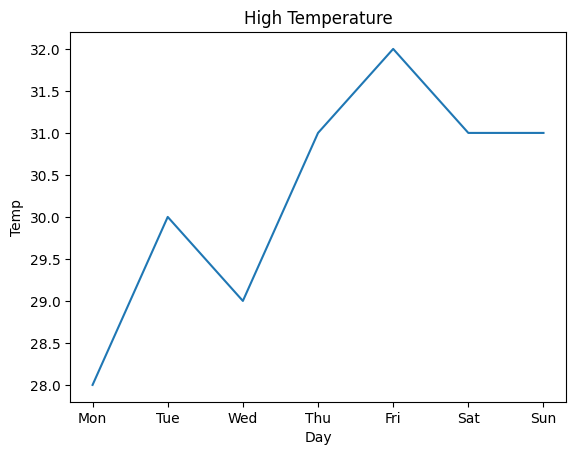

In [23]:
plt.figure()
plt.plot(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], [28,30,29,31,32,31,31] )
plt.xlabel('Day')
plt.ylabel('Temp')
plt.title('High Temperature')
plt.show()

#### 범례 추가
- Plot에 여러 라인 추가하려면 `plt.plot()`을 `plt.show()` 이전에 **여러번 사용**
- 각 라인에 대한 범례를 추가하려면 `plt.legend()` 함수 사용

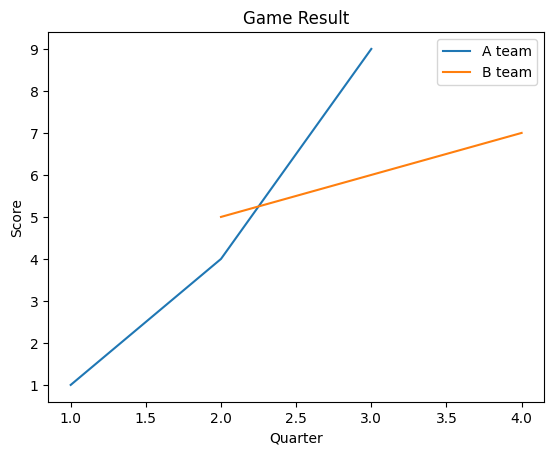

In [ ]:
plt.plot([1,2,3],[1,4,9],label='A team')
plt.plot([2,3,4],[5,6,7],label='B team')
plt.xlabel('Quarter')
plt.ylabel('Score')
plt.title('Game Result')
plt.legend()
plt.show()

## Seaborn

In [28]:
import seaborn as sns
df = pd.read_csv('cust_data.csv')
df.head()

,class,sex,age,service,stop,npay,avg_bill,A_bill,B_bill,termination,by_age,bill_rating,low,lowmid,mid,midhigh,high
0,C,F,28,0,N,N,2640.0000,792.00000,1584.0000,Y,25,low,1,0,0,0,0
1,E,F,24,1,N,N,16840.0000,2526.00000,6983.0000,N,20,high,0,0,0,0,1
2,F,F,32,1,N,N,15544.7334,2331.71001,6750.4666,N,30,high,0,0,0,0,1
3,D,M,18,1,N,N,4700.0000,0.00000,4502.0000,N,15,lowmid,0,1,0,0,0
4,C,F,78,1,N,N,1361.7999,1173.99990,0.0000,N,75,low,1,0,0,0,0


### 1. 목적별 차트 그리기

#### scatterplot(산점도 출력)

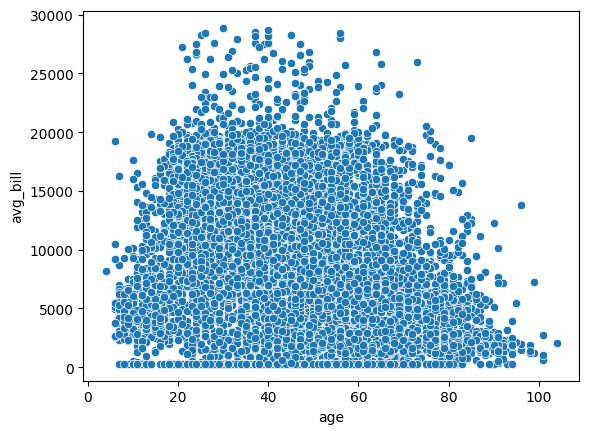

In [29]:
sns.scatterplot(x = 'age',y = 'avg_bill',data = df)
plt.show()

#### countplot(항목 별 갯수 확인)

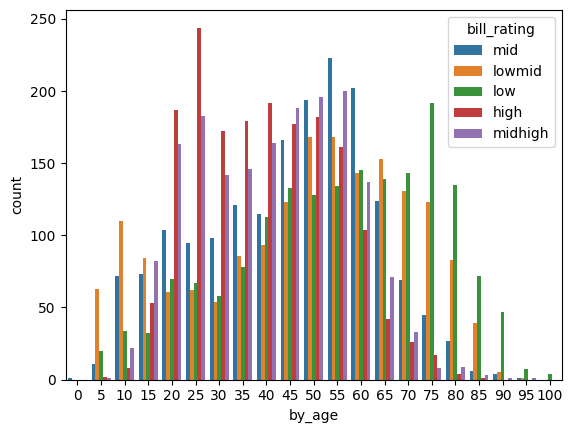

In [30]:
sns.countplot(x = 'by_age', hue='bill_rating', data=df)
plt.show()

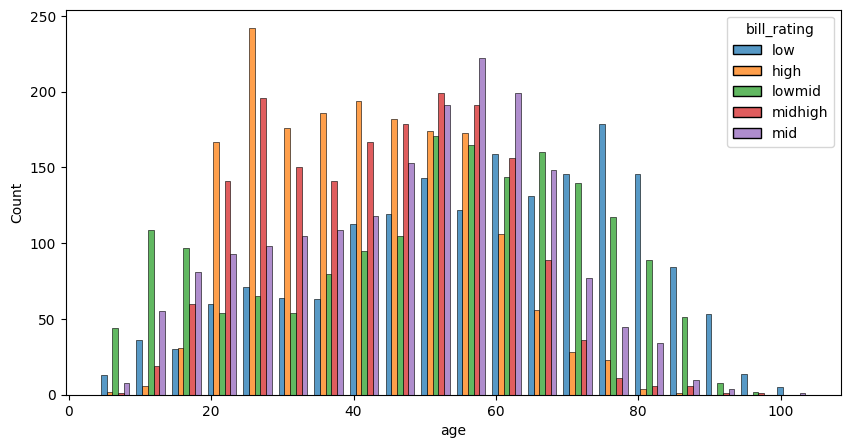

In [32]:
# 연속형 변수인 age로 count plot과 비슷한 그래프 그리기
plt.figure(figsize=(10,5))
sns.histplot(x = 'age', bins = 20, hue = 'bill_rating', data = df,
             multiple = 'dodge', shrink = 0.8)
plt.show()

#### jointplot
산점도와 countplot을 한번에 보여줌
- 데이터 분포
- 상관관계


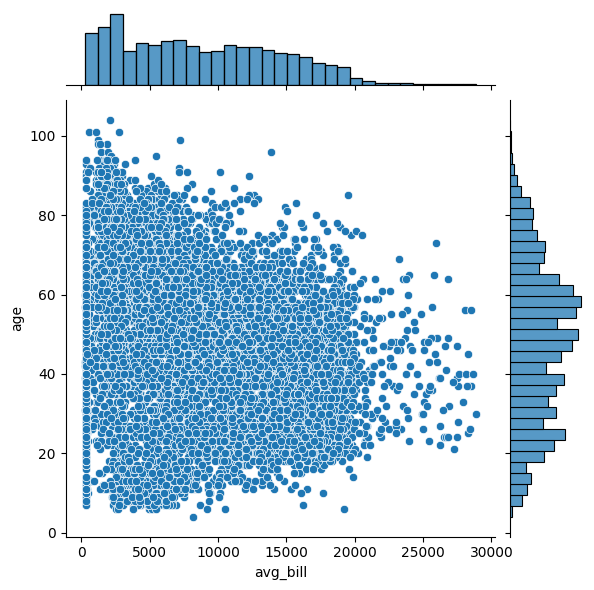

In [33]:
sns.jointplot(x = 'avg_bill', y = 'age', data = df)
plt.show()

#### Heatmap(상관관계)
- 모든 데이터가 'continous'해야함

`corr()`

In [34]:
df.corr(numeric_only = True)

,age,service,avg_bill,A_bill,B_bill,by_age,low,lowmid,mid,midhigh,high
age,1.000000,0.103803,-0.277717,0.039430,-0.314287,0.997400,0.251596,0.063602,-0.014289,-0.126296,-0.174626
service,0.103803,1.000000,0.309764,0.105304,0.237551,0.104549,-0.174414,-0.114866,-0.048798,0.104333,0.233742
avg_bill,-0.277717,0.309764,1.000000,0.377993,0.821419,-0.276747,-0.624771,-0.364884,-0.051386,0.298601,0.742425
A_bill,0.039430,0.105304,0.377993,1.000000,0.039390,0.040340,-0.188217,-0.127146,-0.042265,0.039311,0.318297
B_bill,-0.314287,0.237551,0.821419,0.039390,1.000000,-0.313537,-0.598353,-0.299302,0.018191,0.330088,0.549382
by_age,0.997400,0.104549,-0.276747,0.040340,-0.313537,1.000000,0.250309,0.064440,-0.014697,-0.126484,-0.173583
low,0.251596,-0.174414,-0.624771,-0.188217,-0.598353,0.250309,1.000000,-0.249982,-0.250071,-0.249982,-0.250071
lowmid,0.063602,-0.114866,-0.364884,-0.127146,-0.299302,0.064440,-0.249982,1.000000,-0.249982,-0.249893,-0.249982
mid,-0.014289,-0.048798,-0.051386,-0.042265,0.018191,-0.014697,-0.250071,-0.249982,1.000000,-0.249982,-0.250071
midhigh,-0.126296,0.104333,0.298601,0.039311,0.330088,-0.126484,-0.249982,-0.249893,-0.249982,1.000000,-0.249982


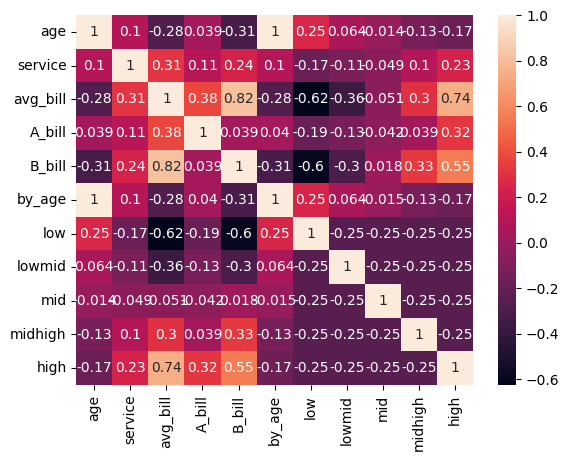

In [35]:
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.show()

#### boxplot

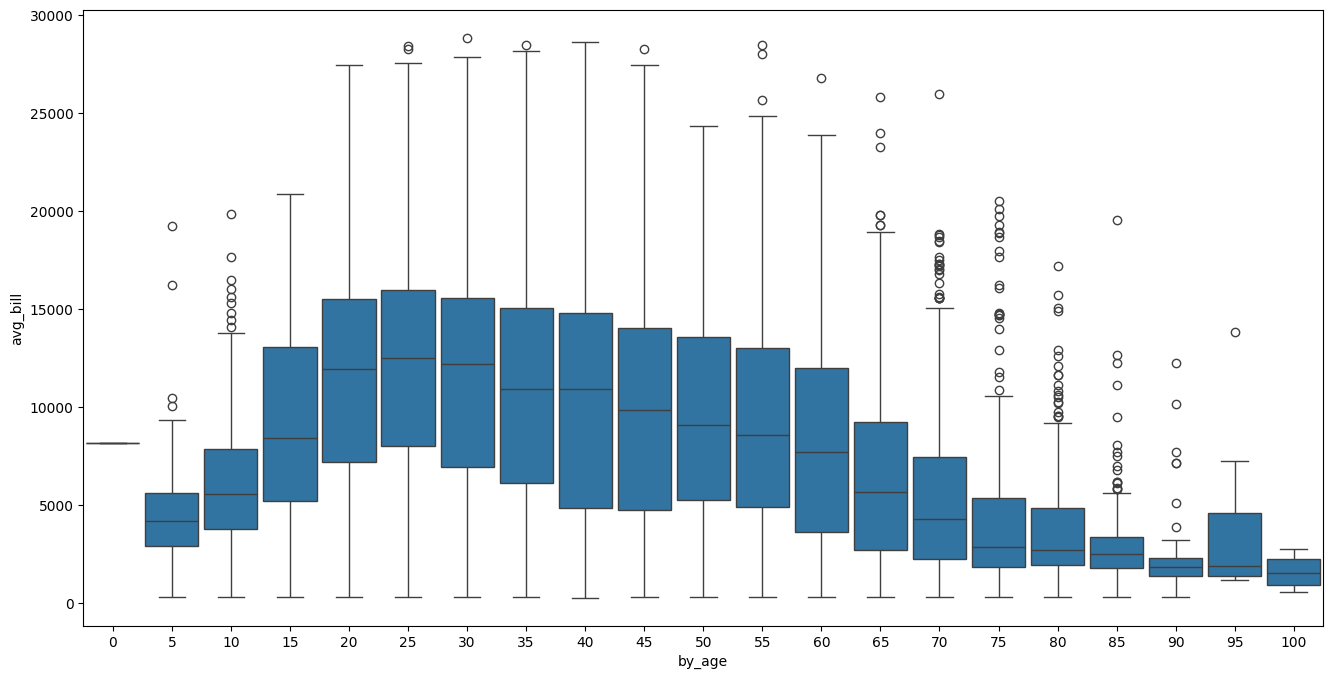

In [38]:
plt.figure(figsize=(16,8))
sns.boxplot(data = df, y = 'avg_bill', x = 'by_age', width = 0.9)
plt.show()